In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleveland.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [3]:
df.columns = ['age', 'sex', 'cp', 'restbps', 'chol', 'fbs', 'restecg',
              'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

df

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.000000,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.000000,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.000000,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.000000,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,3.0,1


**Distribution of Target vs Age**

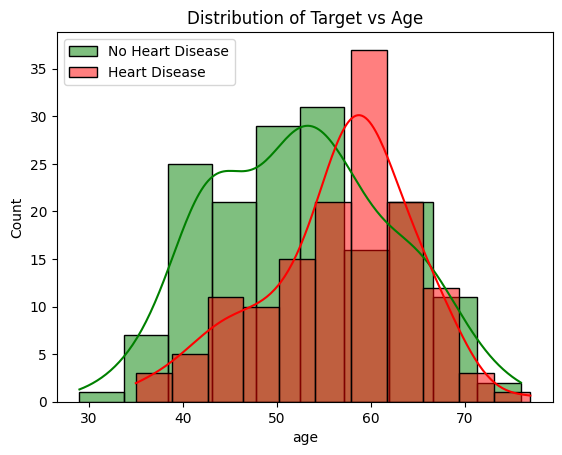

In [4]:
sns.histplot(df.age[df.target==0], color='green', label='No Heart Disease', kde=True)
sns.histplot(df.age[df.target==1], color='red', label='Heart Disease', kde=True)
plt.title('Distribution of Target vs Age')
plt.legend()
plt.show()

**Distribution of Target vs Age and Sex**

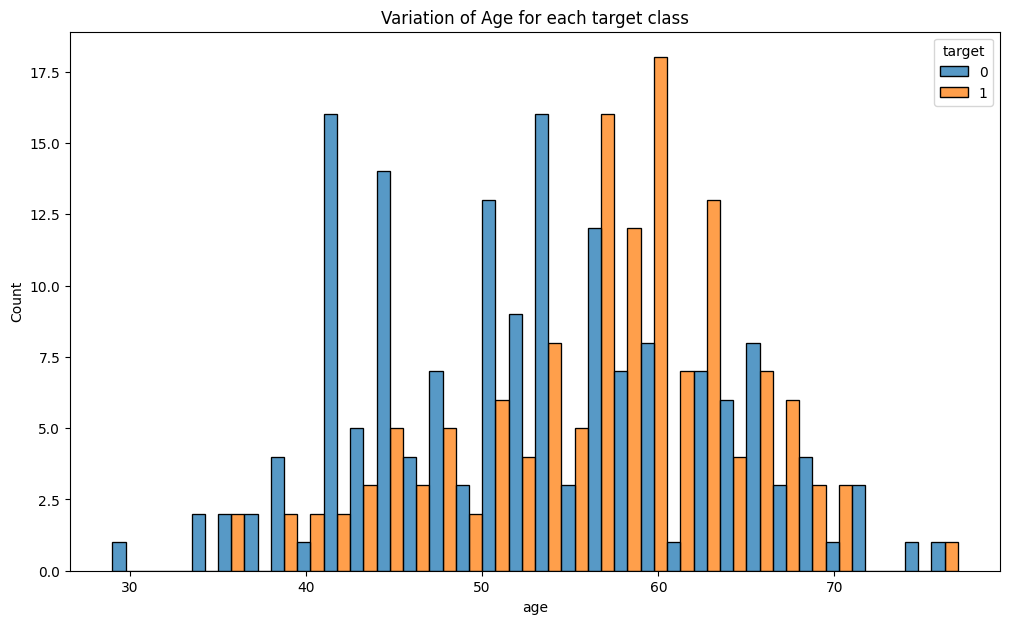

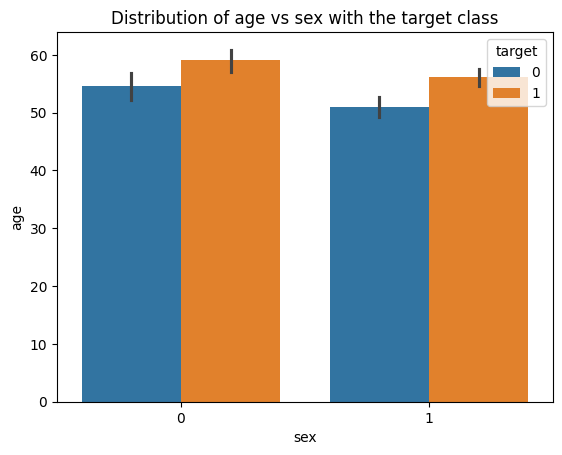

In [5]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='age', hue='target', element='bars', multiple='dodge', bins=32)
plt.title('Variation of Age for each target class')
plt.show()

sns.barplot(data=df, x='sex', y='age', hue='target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

---

**Train/Test Split**

In [6]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

**KNN**

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,
                           weights='uniform',
                           algorithm='auto',
                           leaf_size=30,
                           p=2,
                           metric='minkowski')

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(y_train, knn.predict(X_train))
cm_test = confusion_matrix(y_test, knn.predict(X_test))

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))

Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


---

**SVM**

In [9]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [10]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf',
          random_state=42)

svm.fit(X_train, y_train)

SVC(random_state=42)

In [11]:
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(y_train, svm.predict(X_train))
cm_test = confusion_matrix(y_test, svm.predict(X_test))

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for SVM = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVM = {}'.format(accuracy_for_test))

Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


---

**Naive Bayes**

In [12]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [16]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)

GaussianNB()

In [17]:
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(y_train, nb.predict(X_train))
cm_test = confusion_matrix(y_test, nb.predict(X_test))

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for Naive Bayes = {}'.format(accuracy_for_train))
print('Accuracy for test set for Naive Bayes = {}'.format(accuracy_for_test))

Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.84


---

**Decision Tree**

In [18]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',
                            max_depth=10,
                            min_samples_split=2)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [20]:
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(y_train, dt.predict(X_train))
cm_test = confusion_matrix(y_test, dt.predict(X_test))

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for Decision Tree = {}'.format(accuracy_for_train))
print('Accuracy for test set for Decision Tree = {}'.format(accuracy_for_test))

Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.74


---

**Random Forest**

In [21]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10,
                            criterion='gini',
                            max_depth=10,
                            min_samples_split=2,
                            random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

In [23]:
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(y_train, rf.predict(X_train))
cm_test = confusion_matrix(y_test, rf.predict(X_test))

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for Random Forest = {}'.format(accuracy_for_train))
print('Accuracy for test set for Random Forest = {}'.format(accuracy_for_test))

Accuracy for training set for Random Forest = 0.98
Accuracy for test set for Random Forest = 0.8


---

**AdaBoost**

In [24]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [25]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(n_estimators=50,
                        learning_rate=1.0)

ab.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [26]:
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(y_train, ab.predict(X_train))
cm_test = confusion_matrix(y_test, ab.predict(X_test))

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for AdaBoost = {}'.format(accuracy_for_train))
print('Accuracy for test set for AdaBoost = {}'.format(accuracy_for_test))

Accuracy for training set for AdaBoost = 0.91
Accuracy for test set for AdaBoost = 0.84


---

**GradientBoost**

In [27]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100,
                                learning_rate=0.1,
                                subsample=1.0,
                                min_samples_split=2,
                                max_depth=3,
                                random_state=42)

gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [29]:
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(y_train, gb.predict(X_train))
cm_test = confusion_matrix(y_test, gb.predict(X_test))

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for GradientBoost = {}'.format(accuracy_for_train))
print('Accuracy for test set for GradientBoost = {}'.format(accuracy_for_test))

Accuracy for training set for GradientBoost = 1.0
Accuracy for test set for GradientBoost = 0.85


---

**XGBoost**

In [30]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [31]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective="binary:logistic",
                    random_state=42,
                    n_estimators = 100)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [32]:
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(y_train, xgb.predict(X_train))
cm_test = confusion_matrix(y_test, xgb.predict(X_test))

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for XGBoost = {}'.format(accuracy_for_train))
print('Accuracy for test set for XGBoost = {}'.format(accuracy_for_test))

Accuracy for training set for XGBoost = 1.0
Accuracy for test set for XGBoost = 0.87


---

**Stacking**

In [33]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
gc = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier()
svc = SVC(kernel='rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

In [37]:
from sklearn.ensemble import StackingClassifier

estimators = [('dtc', dtc),
              ('rfc', rfc),
              ('knn', knn),
              ('gc', gc),
              ('svc', svc),
              ('ad', ad)]

stack = StackingClassifier(estimators=estimators,
                           final_estimator=xgb)

stack.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

StackingClassifier(estimators=[('dtc', DecisionTreeClassifier(random_state=42)),
                               ('rfc', RandomForestClassifier(random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('gc',
                                GradientBoostingClassifier(random_state=42)),
                               ('svc', SVC(random_state=42)),
                               ('ad', AdaBoostClassifier(random_state=42))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

In [38]:
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(y_train, stack.predict(X_train))
cm_test = confusion_matrix(y_test, stack.predict(X_test))

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for Stacking = {}'.format(accuracy_for_train))
print('Accuracy for test set for Stacking = {}'.format(accuracy_for_test))

Accuracy for training set for Stacking = 0.92
Accuracy for test set for Stacking = 0.9
